In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

cat = Image.open('/content/cat_gray.jpg').convert('L')
dog = Image.open('/content/dog_gray.jpg').convert('L')
cat_array = np.array(cat, dtype=float)
dog_array = np.array(dog, dtype=float)
print("Cat image shape:", cat_array.shape)


Cat image shape: (361, 410)


In [49]:
from numpy.fft import fft2
Fft_cat = fft2(cat_array)         # 2D DFT of cat image
mag_cat = np.abs(Fft_cat)         # Magnitude spectrum (linear)


In [5]:
mag_cat_log = 20 * np.log10(mag_cat)

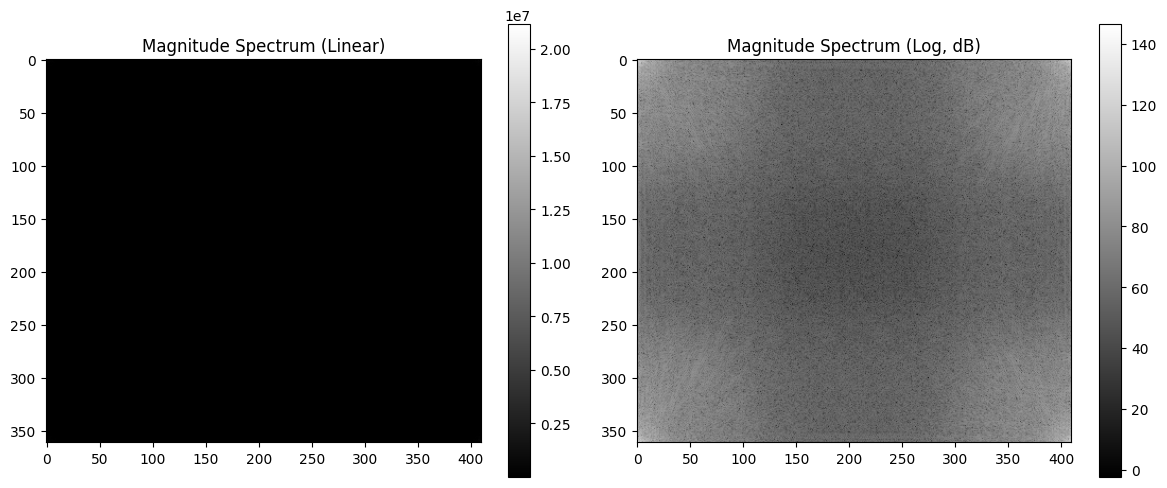

In [6]:
plt.figure(figsize=(12,5))

# Linear magnitude spectrum
plt.subplot(1, 2, 1)
plt.imshow(mag_cat, cmap='gray')
plt.title('Magnitude Spectrum (Linear)')
plt.colorbar()

# Log magnitude spectrum
plt.subplot(1, 2, 2)
plt.imshow(mag_cat_log, cmap='gray')
plt.title('Magnitude Spectrum (Log, dB)')
plt.colorbar()

plt.tight_layout()
plt.show()

In [7]:
from numpy.fft import fftshift
F_cat_shifted = fftshift(F_cat)
mag_cat_shifted = np.abs(F_cat_shifted)
mag_cat_shifted_log = 20 * np.log10(mag_cat_shifted + 1e-8)


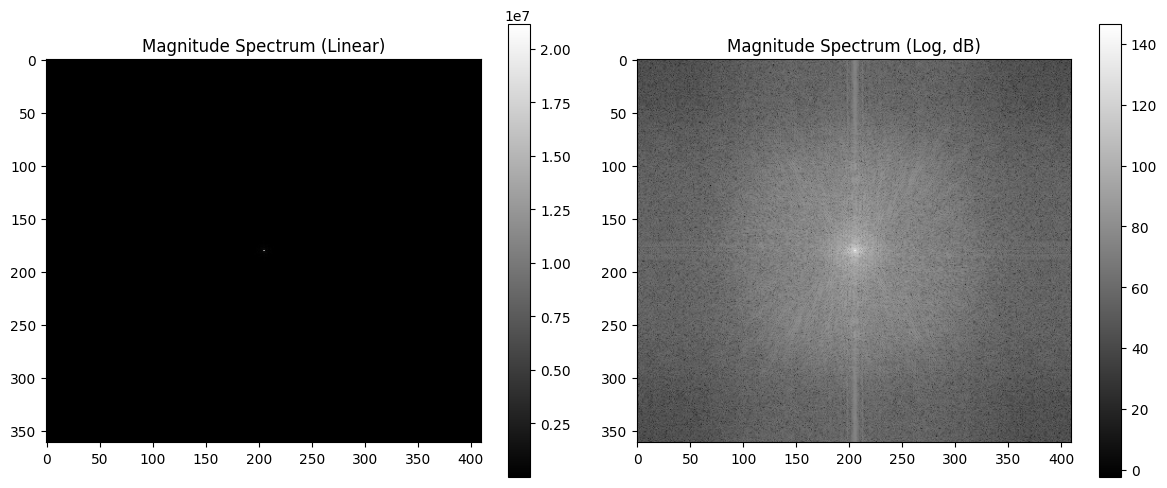

In [8]:
plt.figure(figsize=(12,5))

# Linear magnitude spectrum
plt.subplot(1, 2, 1)
plt.imshow(mag_cat_shifted, cmap='gray')
plt.title('Magnitude Spectrum (Linear)')
plt.colorbar()

# Log magnitude spectrum
plt.subplot(1, 2, 2)
plt.imshow(mag_cat_shifted_log, cmap='gray')
plt.title('Magnitude Spectrum (Log, dB)')
plt.colorbar()

plt.tight_layout()
plt.show()

In [9]:
cat_rot = dog.rotate(90, expand=True)      # Rotate 90 degrees CCW
cat_rot_array = np.array(cat_rot, dtype=float)
F_cat_rot = fft2(cat_rot_array)

mag_cat_rot = np.abs(F_cat_rot)
mag_cat_rot_log = 20 * np.log10(mag_cat_rot)


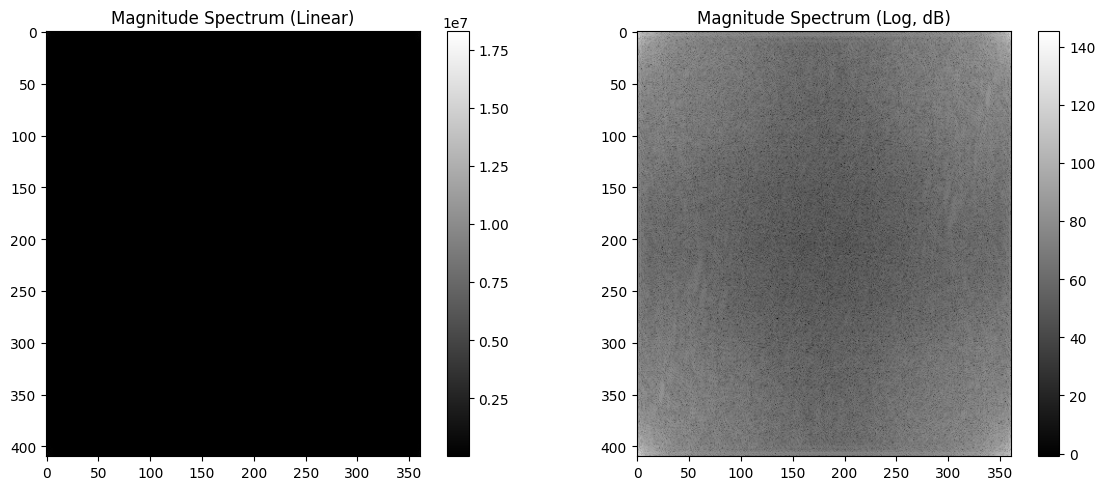

In [10]:
plt.figure(figsize=(12,5))

# Linear magnitude spectrum
plt.subplot(1, 2, 1)
plt.imshow(mag_cat_rot ,cmap='gray')
plt.title('Magnitude Spectrum (Linear)')
plt.colorbar()

# Log magnitude spectrum
plt.subplot(1, 2, 2)
plt.imshow(mag_cat_rot_log, cmap='gray')
plt.title('Magnitude Spectrum (Log, dB)')
plt.colorbar()

plt.tight_layout()
plt.show()

In [11]:
F_cat_rot_shifted = fftshift(F_cat_rot)
mag_cat_rot_shifted = np.abs(F_cat_rot_shifted)
mag_cat_rot_log_shifted = 20 * np.log10(mag_cat_rot_shifted)

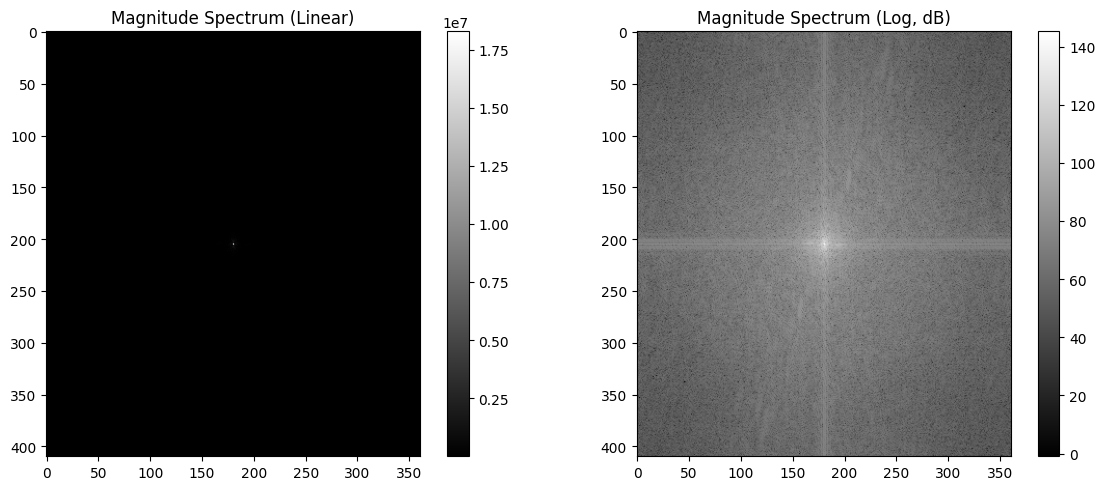

In [12]:
plt.figure(figsize=(12,5))

# Linear magnitude spectrum
plt.subplot(1, 2, 1)
plt.imshow(mag_cat_rot_shifted ,cmap='gray')
plt.title('Magnitude Spectrum (Linear)')
plt.colorbar()

# Log magnitude spectrum
plt.subplot(1, 2, 2)
plt.imshow(mag_cat_rot_log_shifted, cmap='gray')
plt.title('Magnitude Spectrum (Log, dB)')
plt.colorbar()

plt.tight_layout()
plt.show()

In [43]:
def gaussian_filter_2d(shape, sigma):
    """Create a 2D Gaussian filter in frequency domain"""
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2

    # Create coordinate matrices
    u = np.arange(rows) - crow
    v = np.arange(cols) - ccol
    U, V = np.meshgrid(v, u)

    # Distance from center
    D = np.sqrt(U**2 + V**2)

    # Gaussian filter
    G = np.exp(-(D**2) / (2 * sigma**2))
    return G


In [47]:
    sigma_low = 10
    sigma_high = 20


    # Compute 2D FFT of both images
    fft1 = np.fft.fft2(cat_array)
    fft2 = np.fft.fft2(dog_array)

    # Shift to center the zero frequency
    fft1_shifted = np.fft.fftshift(fft1)
    fft2_shifted = np.fft.fftshift(fft2)

    # Create filters
    low_pass = gaussian_filter_2d(cat_array.shape, sigma_low)
    high_pass = 1 - gaussian_filter_2d(dog_array.shape, sigma_high)

    # Apply filters
    low_freq_component = fft1_shifted * low_pass
    high_freq_component = fft2_shifted * high_pass

    # Combine frequencies
    hybrid_fft = low_freq_component + 3*high_freq_component

    # Shift back and take inverse FFT
    hybrid_fft_shifted = np.fft.ifftshift(hybrid_fft)
    hybrid_image = np.real(np.fft.ifft2(hybrid_fft_shifted))

    # Normalize to 0-255 range
    hybrid_image = np.uint8(np.clip(hybrid_image, 0, 255))




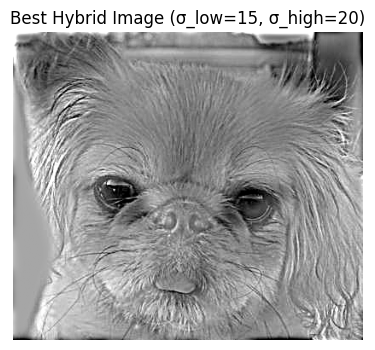

In [ ]:

# show big
plt.figure(figsize=(5, 4))
plt.imshow(hybrid_image, cmap='gray')
plt.title(f"Best Hybrid Image (σ_low={best_sigma_low}, σ_high={sigma_high})")
plt.axis('off')
plt.show()
